In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from utils.AntoineEquation import * 
from IPython.display import clear_output
from tqdm import tqdm
from distillation.DistillationTernary import *
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output


In [2]:
# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

# Antoine Parameters for Xylene
Xyl_A = 4.14553
Xyl_B = 1474.403
Xyl_C = -55.377

P_sys = 1.0325
# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquationBase10(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquationBase10(Tol_A, Tol_B, Tol_C)
xylene_antoine = AntoineEquationBase10(Xyl_A, Xyl_B, Xyl_C)

print(benzene_antoine.get_boiling_point(1))
print(toluene_antoine.get_boiling_point(1))
print(xylene_antoine.get_boiling_point(1))
# Create a Raoult's law object
TolBenXylSys = RaoultsLawModel(3,P_sys,[benzene_antoine, toluene_antoine, xylene_antoine])
# TolBenXylSys.plot_ternary_txy(100, keep_zero=0)

352.8600135066221
383.31052448955074
411.0379166982268


In [3]:
R1_slider =  widgets.FloatLogSlider(value=1.0, base=10, min=0, max=2, step=0.001,  description='Reflux Ratio:', readout_format='.1f')
go_button = widgets.Button(description='Create Model', width='15%', margin='0 10px 0 0')
out_oplines = Output()

def plot_rect_strip_ex2(R = R1_slider):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    xF = np.array([0.3, 0.3, 0.4])
    xD = np.array([0.990, 0.0100, 1e-10])
    xB = np.array([1e-5, 0.4261,0.5749])
    distillation_model = DistillationModelTernary(TolBenXylSys, xF = xF, xD = xD, xB = xB, reflux = R)
    fig, ax = plt.subplots(1,1,figsize= (5,5))
    distillation_model.plot_rect_strip_comp(ax)
    plt.subplots_adjust(hspace=0)
    plt.show()

In [4]:
def on_go_button_click(b):
    with out_oplines:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_rect_strip_ex2( R=R1_slider.value)
        
go_button = Button(description='Generate Plot')
go_button.on_click(on_go_button_click)

layout = VBox([HBox([R1_slider, go_button]), out_oplines])
display(layout)

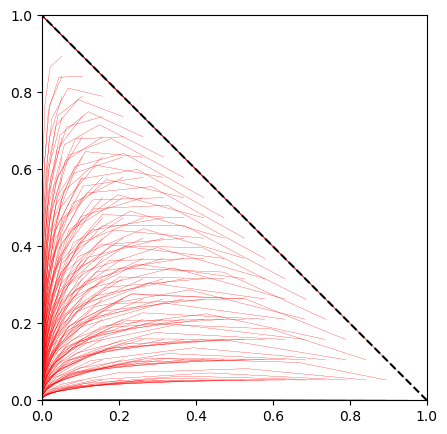

In [5]:
from ipywidgets import HBox, VBox, FloatSlider, Output
import matplotlib.pyplot as plt
import numpy as np

out_residue = Output()

distillation_model = DistillationModelTernary(TolBenXylSys, xF=np.array([0.4,0.3,0.3]), xD=np.array([0.3,0.3,0.4]), xB=np.array([0.3,0.3,0.4]), reflux=1e10)
fig, ax = plt.subplots(1,1,figsize= (5,5))
distillation_model.plot_residue_curve(0,ax)




In [6]:
data_points = 100
xs = []
x1s, x2s = np.meshgrid(np.linspace(0, 1, data_points), 
                        np.linspace(0, 1, data_points))

T = np.zeros((data_points, data_points))
y1s, y2s = np.zeros((data_points, data_points)), np.zeros((data_points, data_points))

for i in range(data_points):
    for j in range(data_points):
        if x1s[i, j] + x2s[i, j] > 1:
            pass
        else:
            xs.append(np.array([x1s[i, j], x2s[i, j], 1 - x1s[i, j] - x2s[i, j]]))
